In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/Colab-Notebooks/Datasets

Mounted at /gdrive
/gdrive/MyDrive/Colab-Notebooks/Datasets


In [ ]:
!ls

spectrogram  test.csv  train.csv


In [ ]:
train = pd.read_csv("train.csv")
train.head()

,classID,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel16375,pixel16376,pixel16377,pixel16378,pixel16379,pixel16380,pixel16381,pixel16382,pixel16383,pixel16384
0,0,0,0,0,0,0,0,0,0,0,...,189,152,176,154,135,117,128,165,169,178
1,7,0,0,0,0,0,0,0,0,0,...,57,59,68,79,56,38,90,95,38,37
2,1,0,0,0,0,0,0,0,0,0,...,132,132,132,132,133,145,145,145,145,145
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,163,143,181,173,176,190,174,168,178,146


In [ ]:
test = pd.read_csv("test.csv")
test.head()

,classID,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel16375,pixel16376,pixel16377,pixel16378,pixel16379,pixel16380,pixel16381,pixel16382,pixel16383,pixel16384
0,5,0,0,0,0,0,0,0,0,0,...,132,131,128,173,123,124,125,102,115,122
1,7,0,0,0,0,0,0,0,0,0,...,49,61,55,93,64,71,92,107,85,98
2,5,0,0,0,0,0,0,0,0,0,...,188,200,185,198,208,190,194,209,192,168
3,4,0,0,0,0,0,0,0,0,0,...,0,0,10,6,0,0,0,0,0,5
4,3,0,0,0,0,0,0,0,0,0,...,38,35,35,0,0,0,12,33,39,44


In [ ]:
print("Train shape: " , train.shape)
print("Test shape: " , test.shape)

Train shape:  (6985, 16385)
Test shape:  (1747, 16385)


In [ ]:
X_train = train.drop(columns="classID",axis=1)
Y_train = train["classID"]
print("X_train shape: " , X_train.shape)
print("Y_train shape: " , Y_train.shape)

X_train shape:  (6985, 16384)
Y_train shape:  (6985,)


In [ ]:
y_test = test["classID"]
x_test = test.drop(columns="classID",axis=1)
print("x_test shape: " , x_test.shape)
print("y_test shape: " , y_test.shape)

x_test shape:  (1747, 16384)
y_test shape:  (1747,)


In [ ]:
X_test, X_val, Y_test, Y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=20)
print("X_test shape: " , X_test.shape)
print("Y_test shape: " , Y_test.shape)
print("X_val shape: " , X_val.shape)
print("Y_val shape: " , Y_val.shape)

X_test shape:  (873, 16384)
Y_test shape:  (873,)
X_val shape:  (874, 16384)
Y_val shape:  (874,)


In [ ]:
# Normalization
X_train = X_train / 255
X_test = X_test / 255
X_val = X_val / 255
X_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel16375,pixel16376,pixel16377,pixel16378,pixel16379,pixel16380,pixel16381,pixel16382,pixel16383,pixel16384
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.741176,0.596078,0.690196,0.603922,0.529412,0.458824,0.501961,0.647059,0.662745,0.698039
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.223529,0.231373,0.266667,0.309804,0.219608,0.149020,0.352941,0.372549,0.149020,0.145098
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.517647,0.517647,0.517647,0.517647,0.521569,0.568627,0.568627,0.568627,0.568627,0.568627
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.639216,0.560784,0.709804,0.678431,0.690196,0.745098,0.682353,0.658824,0.698039,0.572549


In [ ]:
# Reshape
X_train = X_train.values.reshape(-1,128,128,1)
X_test = X_test.values.reshape(-1,128,128,1)
X_val = X_val.values.reshape(-1,128,128,1)
print("X_train shape: " , X_train.shape)
print("X_test shape: " , X_test.shape)
print("X_val shape: " , X_val.shape)

X_train shape:  (6985, 128, 128, 1)
X_test shape:  (873, 128, 128, 1)
X_val shape:  (874, 128, 128, 1)


In [ ]:
# one hot encoding for y 
Y_train = to_categorical(Y_train, num_classes=10)
Y_test = to_categorical(Y_test, num_classes=10)
Y_val = to_categorical(Y_val, num_classes=10)
print("Y_train: " , Y_train.shape , "Y_test: " , Y_test.shape , "Y_val: " , Y_val.shape)

Y_train:  (6985, 10) Y_test:  (873, 10) Y_val:  (874, 10)


In [ ]:
model = Sequential()
#
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (128,128,1)))
model.add(MaxPool2D(pool_size=(2,2)))
#
model.add(Conv2D(filters = 64, 
                 kernel_size = (5,5), 
                 strides = (1,1), 
                 padding = 'Same', 
                 activation ='LeakyReLU'))
model.add(MaxPool2D(pool_size=(2,2)))
#
model.add(Conv2D(filters = 64, 
                 kernel_size = (3,3), 
                 strides = (1,1), 
                 padding = 'Same', 
                 activation ='LeakyReLU'))
# fully connected
model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.25))
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.25))
model.add(Dense(10, activation = "softmax"))

In [ ]:
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [ ]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
epochs = 100  # for better result increase the epochs
batch_size = 32 # default batch size

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False, 
        rotation_range=5, 
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,
        vertical_flip=False)

datagen.fit(X_train)

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 128, 128, 32)      320       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 64, 64, 64)        51264     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 flatten_7 (Flatten)         (None, 65536)            

In [ ]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val, Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/100
218/218 [==============================] - 13s 57ms/step - loss: 1.7245 - accuracy: 0.3811 - val_loss: 1.1992 - val_accuracy: 0.5995
Epoch 2/100
218/218 [==============================] - 13s 62ms/step - loss: 1.3191 - accuracy: 0.5356 - val_loss: 1.0153 - val_accuracy: 0.6373
Epoch 3/100
218/218 [==============================] - 14s 63ms/step - loss: 1.1308 - accuracy: 0.6033 - val_loss: 0.8501 - val_accuracy: 0.6899
Epoch 4/100
218/218 [==============================] - 12s 56ms/step - loss: 1.0131 - accuracy: 0.6517 - val_loss: 0.8058 - val_accuracy: 0.7208
Epoch 5/100
218/218 [==============================] - 12s 56ms/step - loss: 0.9237 - accuracy: 0.6822 - val_loss: 0.9736 - val_accuracy: 0.6854
Epoch 6/100
218/218 [==============================] - 12s 57ms/step - loss: 0.8474 - accuracy: 0.7112 - val_loss: 0.7462 - val_accuracy: 0.7391
Epoch 7/100
218/218 [==============================] - 12s 55ms/step - loss: 0.8214 - accuracy: 0.7158 - val_loss: 0.6794 - val_ac

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()
    plt.grid(True)

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.grid(True)
    plt.legend()
    plt.show()

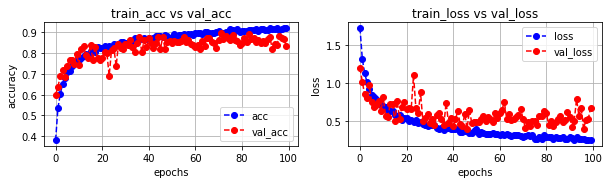

In [ ]:
plot_accuracy_loss(history)

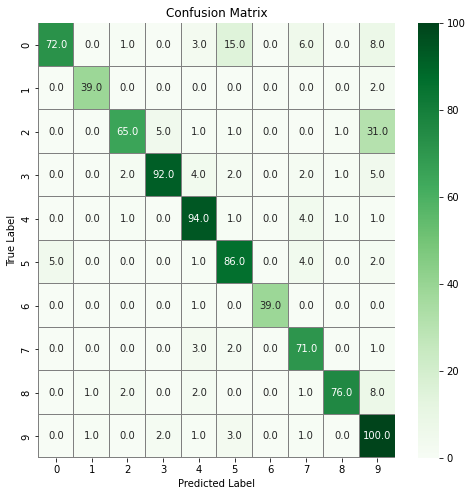

In [ ]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()